# Practical Work 4

- For this practical work, the trainees will develop a Python program that is able to implement the <b>Mini-Batch gradient descent</b> in order to achieve the linear regression (Single and Multivariables) of a set of datapoints.

##### Very Important notes:
- <font color='red'><b>Data should be shuffled for Mini-Batch GD to work fine.</b></font>
- <font color='red'><b>When you shuffle the data, input varibles and equivelant target label should be together. i.e. do not shuffle X and y separately or your data will be missed up.</b></font>
- <font color='red'><b>Save your losses and thetas for each iterations i.e. each mini-batch (not each epoch).</b></font>
- <font color='red'><b>Plot loss vs. iterations (not epochs). This will allow you to see the difference between mini-batch, SGD, and batch GD.</font>
- <font color='red'><b>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</b></font>

### Import numpy, matplotlib.pyplot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Read your multivariable LR data into X, y variables and make shure of dimensions.

In [2]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [3]:
x=data[:,:3]
m=len(x[:,0])
y=data[:, 3].reshape(m,1)
m=len(y)
x,y

(array([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.],
        [ 53.,  46.,  55.],
        [ 69.,  74.,  77.],
        [ 47.,  56.,  60.],
        [ 87.,  79.,  90.],
        [ 79.,  70.,  88.],
        [ 69.,  70.,  73.],
        [ 70.,  65.,  74.],
        [ 93.,  95.,  91.],
        [ 79.,  80.,  73.],
        [ 70.,  73.,  78.],
        [ 93.,  89.,  96.],
        [ 78.,  75.,  68.],
        [ 81.,  90.,  93.],
        [ 88.,  92.,  86.],
        [ 78.,  83.,  77.],
        [ 82.,  86.,  90.],
        [ 86.,  82.,  89.],
        [ 78.,  83.,  85.],
        [ 76.,  83.,  71.],
        [ 96.,  93.,  95.]]),
 array([[152.],
        [185.],
        [180.],
        [196.],
        [142.],
        [101.],
        [149.],
        [115.],
        [175.],
        [164.],
        [141.],
        [141.],
        [184.],
        [152.],
        [148.],
        [192.],
        [147.],
        [183.],
        [1

In [4]:
x

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

### Step 1: Shuffle your data
- In this step we will also get the number of data points <b>(m)</b> and dimensions <b>n+1</b> .
- We will also add the column of ones <b>x0</b>
- Set random seed to 101.
- <b>Make sure the shuffled target label is a column vector</b>.

In [5]:
X=np.concatenate((np.ones((m, 1)),x),axis=1)
X

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [6]:
D=np.concatenate((X,y),axis=1)
D

array([[  1.,  73.,  80.,  75., 152.],
       [  1.,  93.,  88.,  93., 185.],
       [  1.,  89.,  91.,  90., 180.],
       [  1.,  96.,  98., 100., 196.],
       [  1.,  73.,  66.,  70., 142.],
       [  1.,  53.,  46.,  55., 101.],
       [  1.,  69.,  74.,  77., 149.],
       [  1.,  47.,  56.,  60., 115.],
       [  1.,  87.,  79.,  90., 175.],
       [  1.,  79.,  70.,  88., 164.],
       [  1.,  69.,  70.,  73., 141.],
       [  1.,  70.,  65.,  74., 141.],
       [  1.,  93.,  95.,  91., 184.],
       [  1.,  79.,  80.,  73., 152.],
       [  1.,  70.,  73.,  78., 148.],
       [  1.,  93.,  89.,  96., 192.],
       [  1.,  78.,  75.,  68., 147.],
       [  1.,  81.,  90.,  93., 183.],
       [  1.,  88.,  92.,  86., 177.],
       [  1.,  78.,  83.,  77., 159.],
       [  1.,  82.,  86.,  90., 177.],
       [  1.,  86.,  82.,  89., 175.],
       [  1.,  78.,  83.,  85., 175.],
       [  1.,  76.,  83.,  71., 149.],
       [  1.,  96.,  93.,  95., 192.]])

In [7]:
np.random.shuffle(D)
x_sh=D[:,:4]
y_sh=D[:, 4]
y_sh

array([175., 192., 180., 152., 184., 148., 192., 196., 175., 115., 149.,
       175., 142., 164., 177., 185., 141., 159., 152., 177., 183., 149.,
       147., 141., 101.])

### Step 2: Parameters initialization (thetas = column vector of zeros, alpha = 0.00001)
- We will also define empty lists to save losses, thetas in all iterations.
- We will define the <b>mini-batch size</b> here we will use <b>mini-batch size = 4</b> .

In [16]:
alpha=0.00001
thetas = np.zeros(X.shape[1])

In [10]:
thetas=thetas.reshape(-1,1)
thetas

array([[0.],
       [0.],
       [0.],
       [0.]])

### Step 3: Claculate the prediction for the first mini-batch
#### You will need to slize the data and take the first (b = 4) points only according to the mini-batch size.

In [17]:
x_min_batch=x_sh[:4,:4]
y_min_batch=y_sh[:4]
x_min_batch,y_min_batch

(array([[ 1., 87., 79., 90.],
        [ 1., 93., 89., 96.],
        [ 1., 89., 91., 90.],
        [ 1., 79., 80., 73.]]),
 array([175., 192., 180., 152.]))

In [18]:
x_min_batch

array([[ 1., 87., 79., 90.],
       [ 1., 93., 89., 96.],
       [ 1., 89., 91., 90.],
       [ 1., 79., 80., 73.]])

In [19]:
h=x_min_batch@thetas
h

array([0., 0., 0., 0.])

In [20]:
h

array([0., 0., 0., 0.])

### Step 4: Clculate the error vector, cost, gradient as in Multivariable Bacth GD. However, here you will use the mini-batch data only.
#### Make sure in cost and gradient calculation you divide by batch size not the data size.

In [21]:
y_min_batch

array([175., 192., 180., 152.])

In [22]:
e=h-y_min_batch
e

array([-175., -192., -180., -152.])

In [23]:
e

array([-175., -192., -180., -152.])

In [24]:
j= np.mean(e**2) / 2
j

15374.125

In [25]:
print("j min-batch = ",j)

j min-batch =  15374.125


In [28]:
grad=(x_min_batch@e)/4
grad

array([-11194.75, -12160.75, -11830.75, -10209.75])

In [27]:
grad.reshape(-1,1)

array([[-11194.75],
       [-12160.75],
       [-11830.75],
       [-10209.75]])

### Step 5: Update theta values

In [31]:
new_thetas=thetas-alpha*grad
grad

array([-11194.75, -12160.75, -11830.75, -10209.75])

In [30]:
grad.reshape(-1,1)

array([[-11194.75],
       [-12160.75],
       [-11830.75],
       [-10209.75]])

### Step 6: Iterate through all mini-batches to finish the first epoch
#### Save thetas and loss each iteration  (minibatch) i.e. with each update.
#### Reinitialize parameters in the begining.
#### Plot the learning curves to explore parameters update in single epoch.
##### Note: According to the batch size, the last mini-batch should contain either the same data points as the previous mini-batches or more:
- Ex. if m = 25 and mini-batch size = 5 then we will have 5 mini-batches each contains 5 data points.
- Ex. if m = 25 and mini-batch size = 4 then we will have round(25/4) = 6 mini-batches each contains 4 data points except the last one will contain 5 data points.

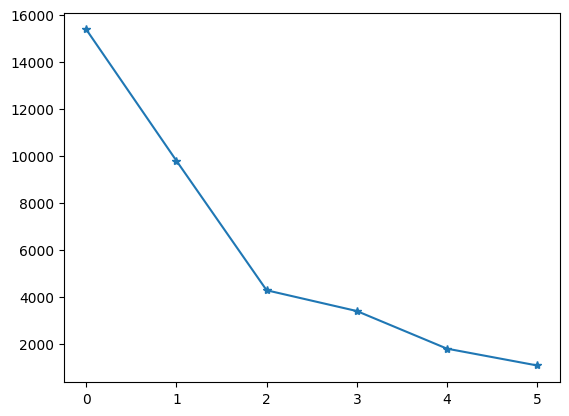

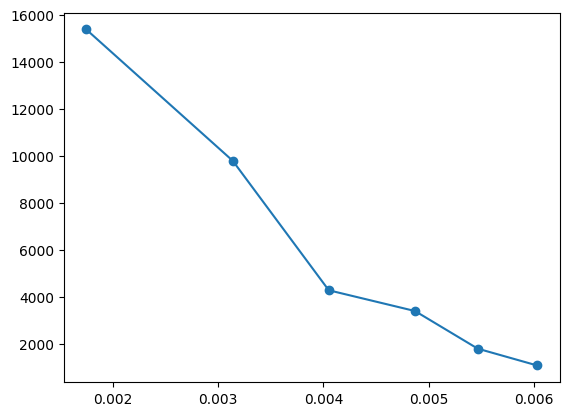

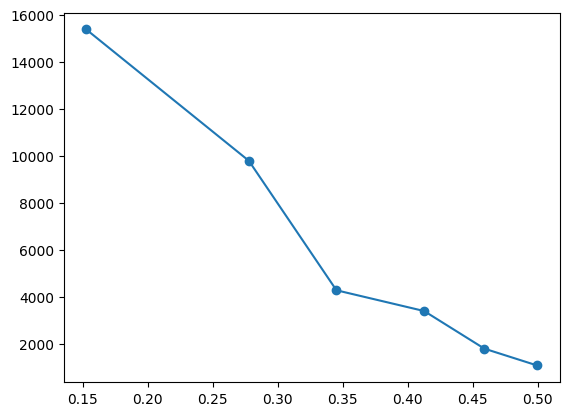

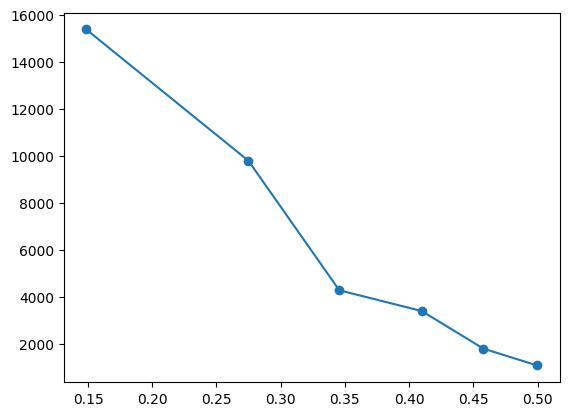

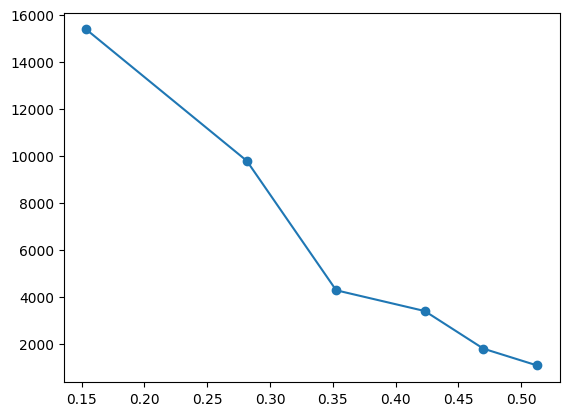

In [39]:
alpha=0.00001
thetas = np.zeros(x_sh.shape[1])
batch_size=4
batch_nums=int(m/batch_size)
loss_vec=[]
thetas_vec=[]
for batch in range(batch_nums):
    if batch+1==batch_nums:
        start=batch*batch_size
        x_batch=x_sh[start:]
        y_batch=y_sh[start:]
    else:
        start=batch*batch_size
        end=(batch+1)*batch_size
        x_batch=x_sh[start:end]
        y_batch=y_sh[start:end]
    h=x_batch@thetas
    e=h-y_batch
    j= np.mean(e**2) / 2
    grad=(x_batch.T@e)/batch_size
    thetas-=alpha*grad
    thetas_vec.append(thetas.copy())
    loss_vec.append(j)
plt.plot(loss_vec, marker='*')
plt.show()
thetas_vec=np.array(thetas_vec)
plt.plot(thetas_vec[:,0],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,1],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,2],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,3],loss_vec, marker='o')
plt.show()

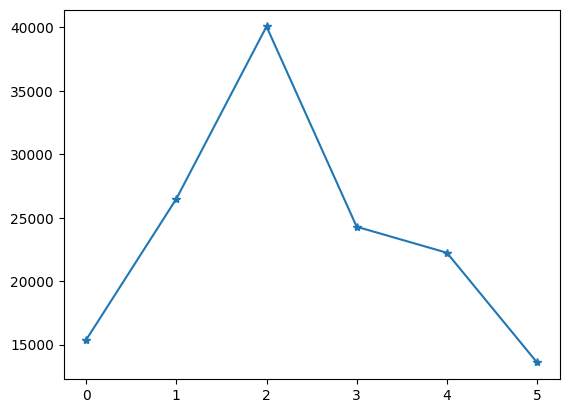

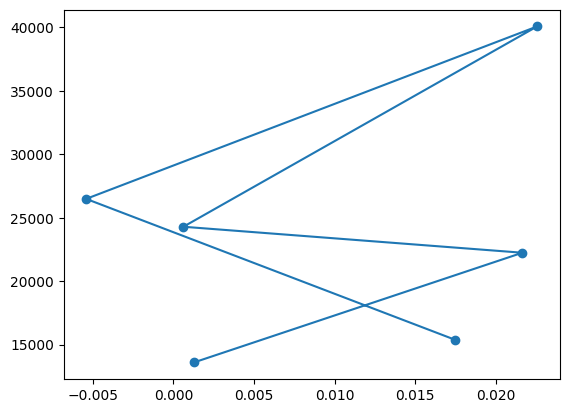

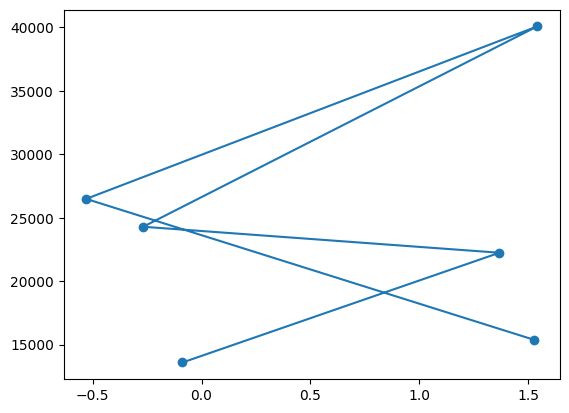

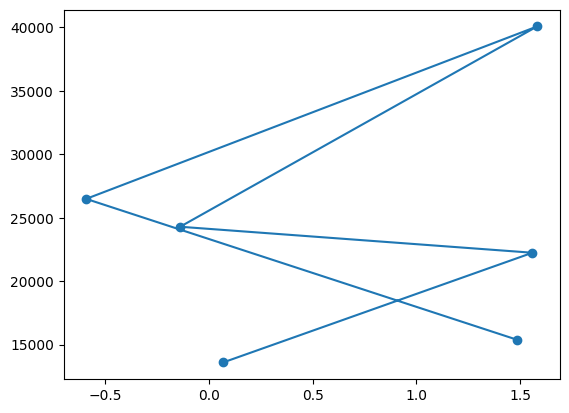

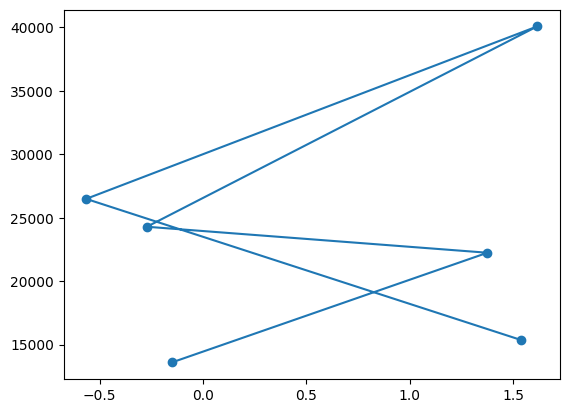

In [40]:
alpha=0.0001
thetas = np.zeros(x_sh.shape[1])
batch_size=4
batch_nums=int(m/batch_size)
loss_vec=[]
thetas_vec=[]
for batch in range(batch_nums):
    if batch+1==batch_nums:
        start=batch*batch_size
        x_batch=x_sh[start:]
        y_batch=y_sh[start:]
    else:
        start=batch*batch_size
        end=(batch+1)*batch_size
        x_batch=x_sh[start:end]
        y_batch=y_sh[start:end]
    h=x_batch@thetas
    e=h-y_batch
    j= np.mean(e**2) / 2
    grad=(x_batch.T@e)/batch_size
    thetas-=alpha*grad
    thetas_vec.append(thetas.copy())
    loss_vec.append(j)
plt.plot(loss_vec, marker='*')
plt.show()
thetas_vec=np.array(thetas_vec)
plt.plot(thetas_vec[:,0],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,1],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,2],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,3],loss_vec, marker='o')
plt.show()

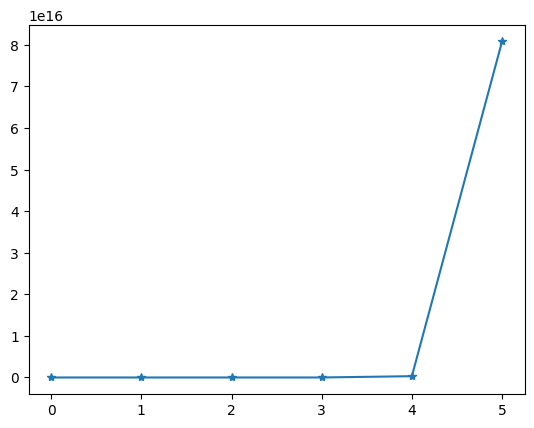

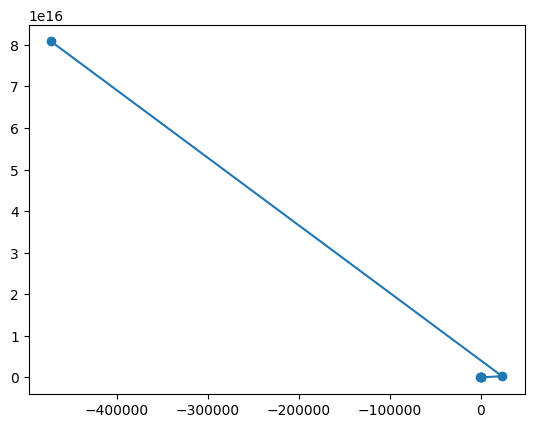

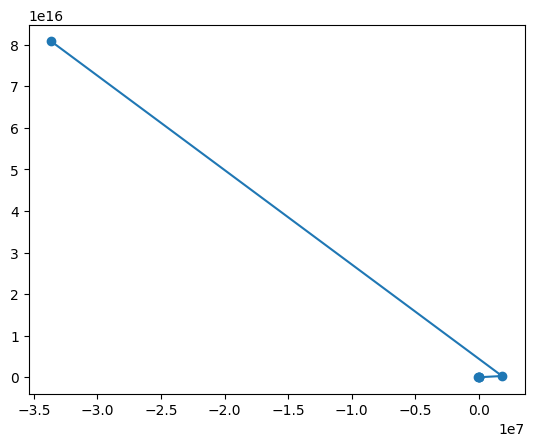

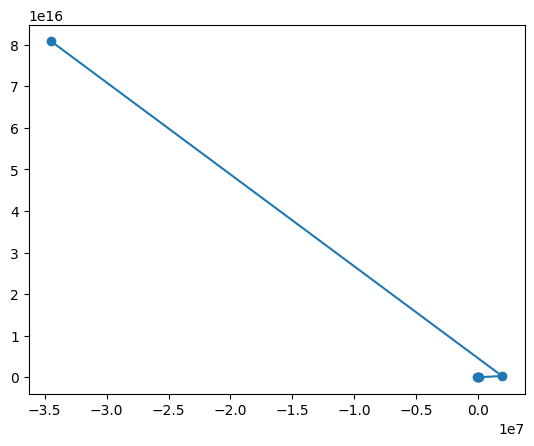

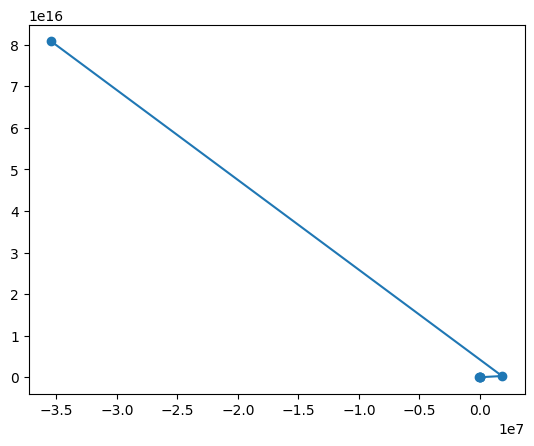

In [41]:
alpha=0.001
thetas = np.zeros(x_sh.shape[1])
batch_size=4
batch_nums=int(m/batch_size)
loss_vec=[]
thetas_vec=[]
for batch in range(batch_nums):
    if batch+1==batch_nums:
        start=batch*batch_size
        x_batch=x_sh[start:]
        y_batch=y_sh[start:]
    else:
        start=batch*batch_size
        end=(batch+1)*batch_size
        x_batch=x_sh[start:end]
        y_batch=y_sh[start:end]
    h=x_batch@thetas
    e=h-y_batch
    j= np.mean(e**2) / 2
    grad=(x_batch.T@e)/batch_size
    thetas-=alpha*grad
    thetas_vec.append(thetas.copy())
    loss_vec.append(j)
plt.plot(loss_vec, marker='*')
plt.show()
thetas_vec=np.array(thetas_vec)
plt.plot(thetas_vec[:,0],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,1],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,2],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,3],loss_vec, marker='o')
plt.show()

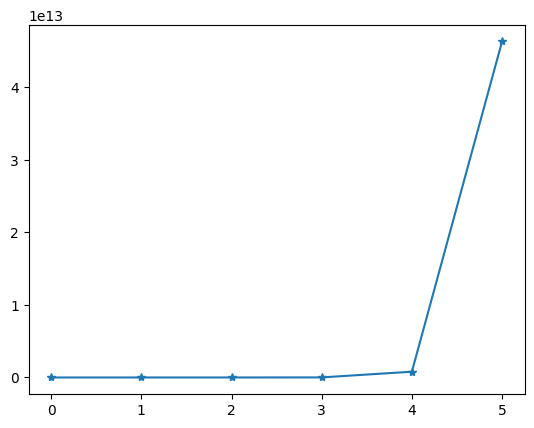

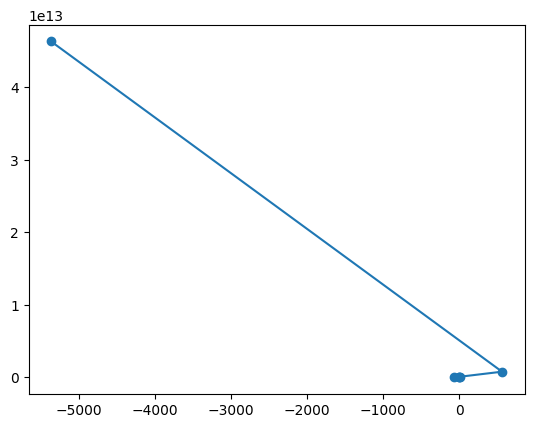

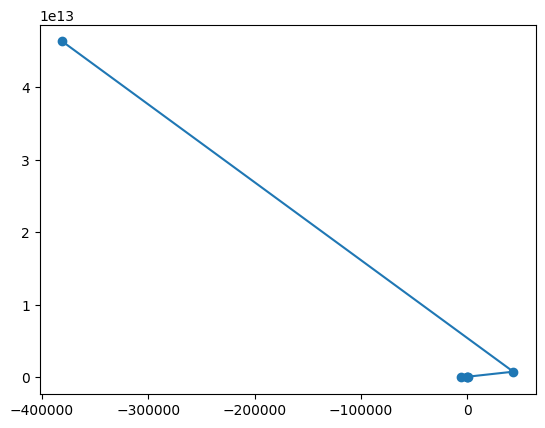

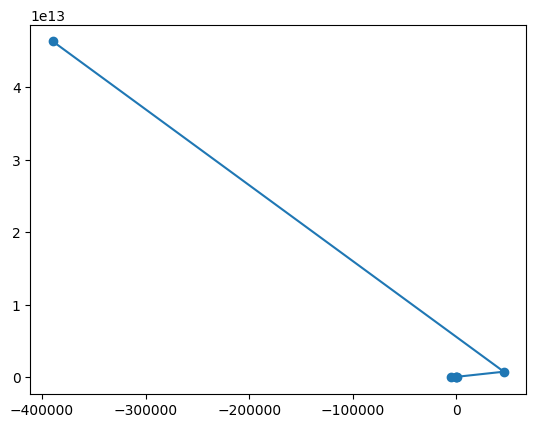

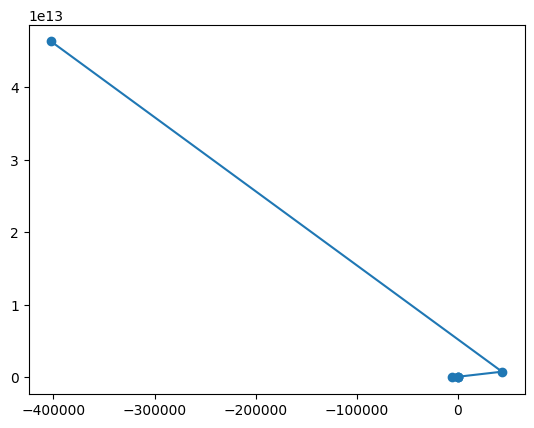

In [42]:
alpha=0.0005
thetas = np.zeros(x_sh.shape[1])
batch_size=4
batch_nums=int(m/batch_size)
loss_vec=[]
thetas_vec=[]
for batch in range(batch_nums):
    if batch+1==batch_nums:
        start=batch*batch_size
        x_batch=x_sh[start:]
        y_batch=y_sh[start:]
    else:
        start=batch*batch_size
        end=(batch+1)*batch_size
        x_batch=x_sh[start:end]
        y_batch=y_sh[start:end]
    h=x_batch@thetas
    e=h-y_batch
    j= np.mean(e**2) / 2
    grad=(x_batch.T@e)/batch_size
    thetas-=alpha*grad
    thetas_vec.append(thetas.copy())
    loss_vec.append(j)
plt.plot(loss_vec, marker='*')
plt.show()
thetas_vec=np.array(thetas_vec)
plt.plot(thetas_vec[:,0],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,1],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,2],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,3],loss_vec, marker='o')
plt.show()

### Step 7: Make outer loop to perform as many epochs as you need to reach the stop conditions
### Remember the following:

##### Very Important notes:
- <font color='red'><b>Data should be shuffled for Mini-Batch GD to work fine.</b></font>
- <font color='red'><b>When you shuffle the data, input varibles and equivelant target label should be together. i.e. do not shuffle X and y separately or your data will be missed up.</b></font>
- <font color='red'><b>Save your losses and thetas for each iterations i.e. each mini-batch (not each epoch).</b></font>
- <font color='red'><b>Plot loss vs. iterations (not epochs). This will allow you to see the difference between mini-batch, SGD, and batch GD.</font>
- <font color='red'><b>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</b></font>

##### The following results uses the hyper-parameters alpha = 0.00001, max. epochs = 10000, gradient check=0.1, and cost convergence check=0.01

In [43]:
alpha=0.00001
thetas = np.zeros(x_sh.shape[1])
batch_size=4
batch_nums=int(m/batch_size)
loss_vec=[]
thetas_vec=[]
prev_loss = float('inf')
for epoch in range(10000):
    for batch in range(batch_nums):
        if batch+1==batch_nums:
            start=batch*batch_size
            x_batch=x_sh[start:]
            y_batch=y_sh[start:]
        else:
            start=batch*batch_size
            end=(batch+1)*batch_size
            x_batch=x_sh[start:end]
            y_batch=y_sh[start:end]
        h=x_batch@thetas
        e=h-y_batch
        j= np.mean(e**2) / 2
        grad=(x_batch.T@e)/batch_size
        if np.linalg.norm(grad) < 0.1:
                break
        thetas-=alpha*grad
        thetas_vec.append(thetas.copy())
        loss_vec.append(j)
    avg_loss = np.mean(loss_vec[-batch_nums:])
    if abs(prev_loss - avg_loss) < 0.01:
        break
    prev_loss = avg_loss   
print(f"j = {j}\n")
print(f"Gradient vector : {grad}\n")
print(f"Gradient norm : {np.linalg.norm(grad)}\n")
print(f"New thetas : {thetas}\n")   

j = 4.024171372651513

Gradient vector : [ 5.48799787e-01  1.63125230e+01 -1.04730482e+00  2.21871964e-03]

Gradient norm : 16.355318381560945

New thetas : [0.00807032 0.66763832 0.66759002 0.6897092 ]



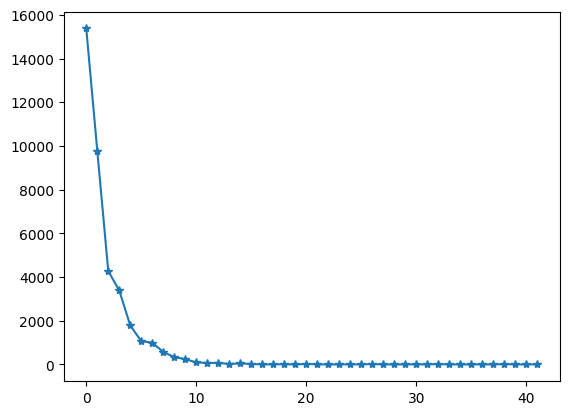

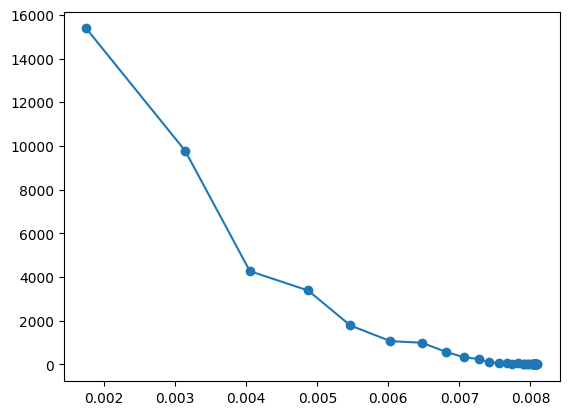

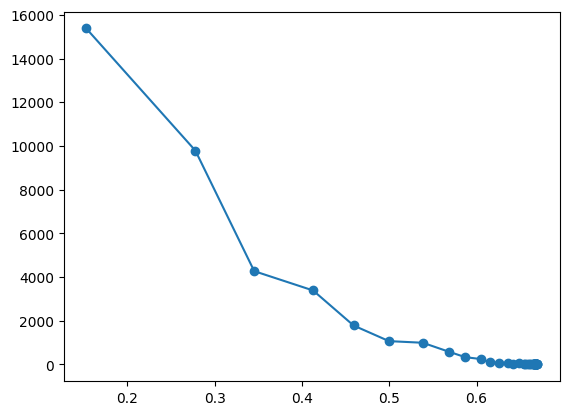

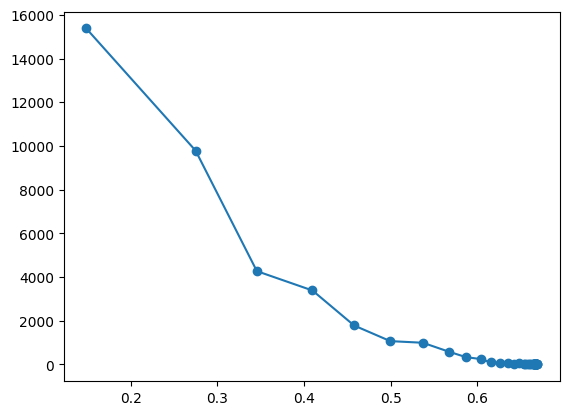

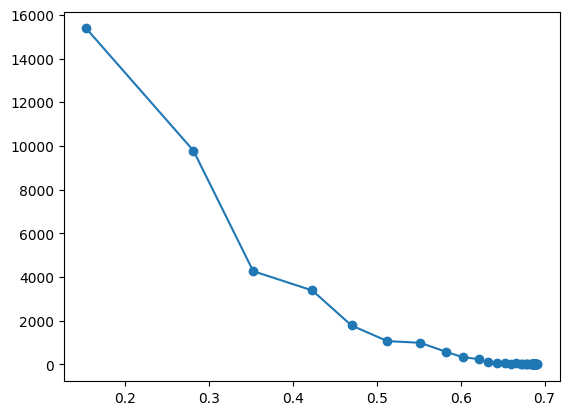

In [44]:
plt.plot(loss_vec, marker='*')
plt.show()
thetas_vec=np.array(thetas_vec)
plt.plot(thetas_vec[:,0],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,1],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,2],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,3],loss_vec, marker='o')
plt.show()

In [45]:
def r_s(y_batch,h):
    y_m = np.sum((y_batch - np.mean(y_batch)) ** 2) 
    y_h = np.sum((y_batch - h) ** 2)  
    r_squared = 1 - (y_h / y_m)
    print(r_squared)

### Make your implementation as a function
##### Use gradient check = 0.1, convergence check = 0.01, batch size = 4, and max_epochs = 10000.

In [46]:
def min_batch(alpha,max_epochs,batch_size,gradient_check,convergence_check):
    thetas = np.zeros(x_sh.shape[1])
    batch_nums=int(m/batch_size)
    loss_vec=[]
    thetas_vec=[]
    prev_loss = float('inf')
    for epoch in range(max_epochs):
        for batch in range(batch_nums):
            if batch+1==batch_nums:
                start=batch*batch_size
                x_batch=x_sh[start:]
                y_batch=y_sh[start:]
            else:
                start=batch*batch_size
                end=(batch+1)*batch_size
                x_batch=x_sh[start:end]
                y_batch=y_sh[start:end]
            h=x_batch@thetas
            e=h-y_batch
            j= np.mean(e**2) / 2
            grad=(x_batch.T@e)/batch_size
            if np.linalg.norm(grad) < gradient_check:
                    break
            thetas-=alpha*grad
            thetas_vec.append(thetas.copy())
            loss_vec.append(j)
        avg_loss = np.mean(loss_vec[-batch_nums:])
        if abs(prev_loss - avg_loss) < convergence_check:
            break
        prev_loss = avg_loss   
    print(f"j = {j}\n")
    print(f"Gradient vector : {grad}\n")
    print(f"Gradient norm : {np.linalg.norm(grad)}\n")
    print(f"New thetas : {thetas}\n") 

In [47]:
min_batch(alpha=0.00001,max_epochs=10000,batch_size=4,gradient_check=0.1,convergence_check=0.01)

j = 4.024171372651513

Gradient vector : [ 5.48799787e-01  1.63125230e+01 -1.04730482e+00  2.21871964e-03]

Gradient norm : 16.355318381560945

New thetas : [0.00807032 0.66763832 0.66759002 0.6897092 ]



In [48]:
r_s(y_batch,h)

0.988208593024345


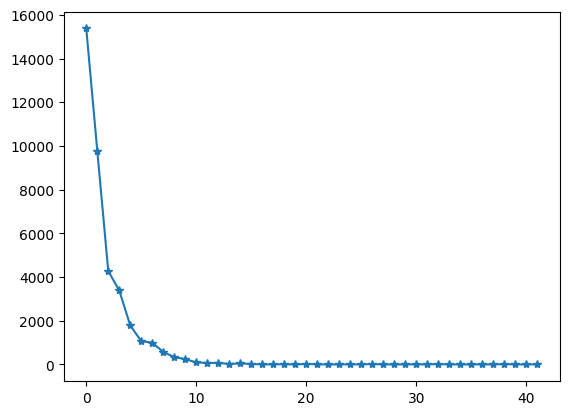

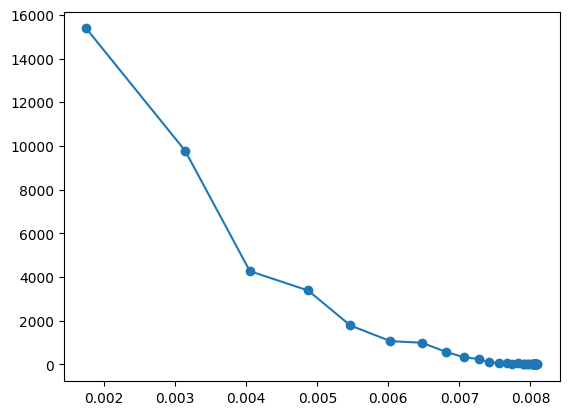

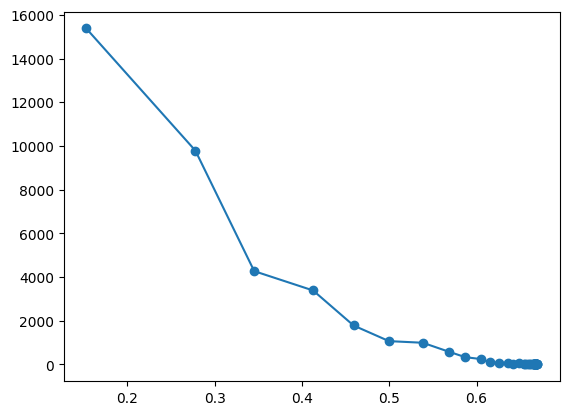

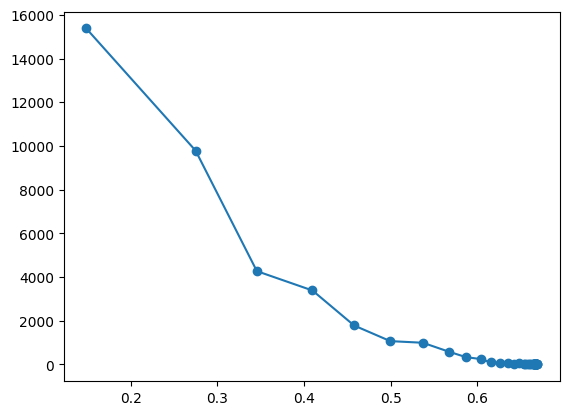

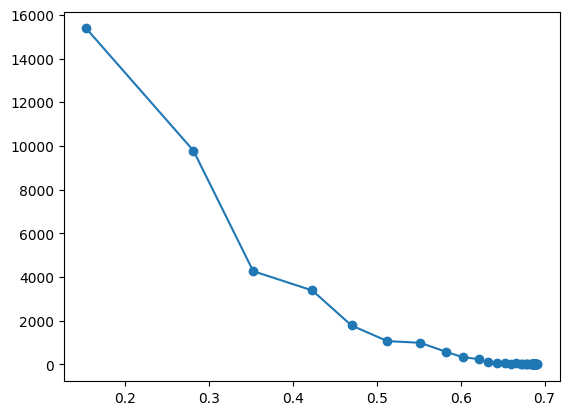

In [50]:
plt.plot(loss_vec, marker='*')
plt.show()
thetas_vec=np.array(thetas_vec)
plt.plot(thetas_vec[:,0],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,1],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,2],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,3],loss_vec, marker='o')
plt.show()

### Try mini-batch size = 1 and mini-batch size = m (25) and observe the results very carefully.

### Mini-batch size = 1

In [51]:
alpha=0.00001
thetas = np.zeros(x_sh.shape[1])
batch_size=1
batch_nums=int(m/batch_size)
loss_vec=[]
thetas_vec=[]
prev_loss = float('inf')
iterations=[]
for epoch in range(10000):
    for batch in range(batch_nums):
        iterations.append(batch)
        if batch+1==batch_nums:
            start=batch*batch_size
            x_batch=x_sh[start:]
            y_batch=y_sh[start:]
        else:
            start=batch*batch_size
            end=(batch+1)*batch_size
            x_batch=x_sh[start:end]
            y_batch=y_sh[start:end]
        h=x_batch@thetas
        e=h-y_batch
        j= np.mean(e**2) / 2
        grad=(x_batch.T@e)/batch_size
        if np.linalg.norm(grad) < 0.1:
                break
        thetas-=alpha*grad
        thetas_vec.append(thetas.copy())
        loss_vec.append(j)
    avg_loss = np.mean(loss_vec[-batch_nums:])
    if abs(prev_loss - avg_loss) < 0.01:
        break
    prev_loss = avg_loss   
print(f"j = {j}\n")
print(f"Gradient vector : {grad}\n")
print(f"Gradient norm : {np.linalg.norm(grad)}\n")
print(f"New thetas : {thetas}\n")   

j = 6.922222624969479

Gradient vector : [  3.72081244 197.20305958 171.15737246 204.64468447]

Gradient norm : 331.77881816394586

New thetas : [0.00623267 0.56550951 0.57520635 0.8724953 ]



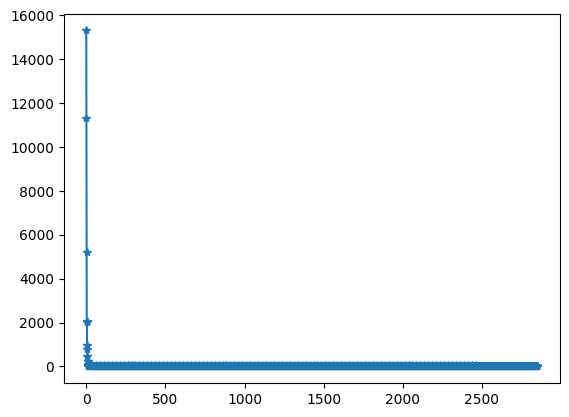

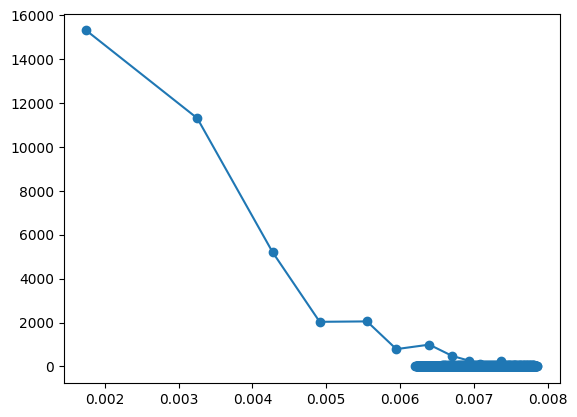

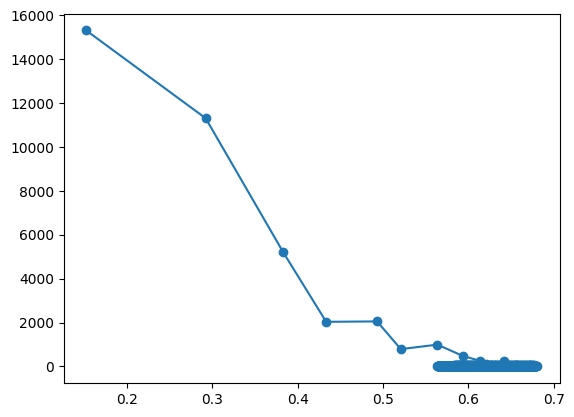

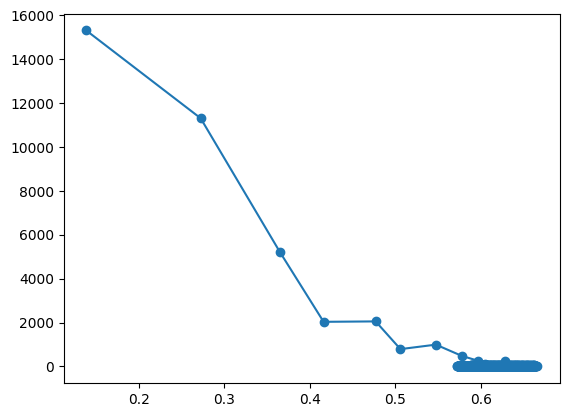

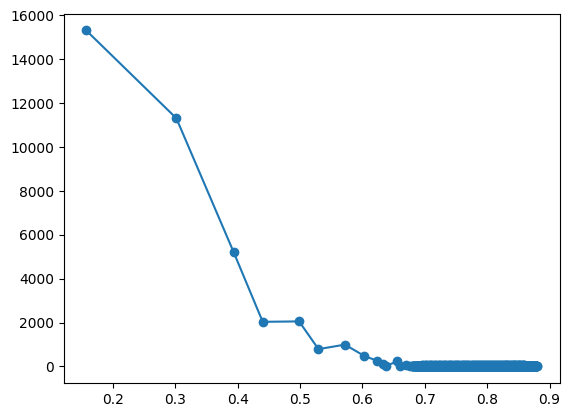

In [52]:
plt.plot(loss_vec, marker='*')
plt.show()
thetas_vec=np.array(thetas_vec)
plt.plot(thetas_vec[:,0],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,1],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,2],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,3],loss_vec, marker='o')
plt.show()

### Mini-batch size = m (25)

In [53]:
alpha=0.00001
thetas = np.zeros(x_sh.shape[1])
batch_size=25
batch_nums=int(m/batch_size)
loss_vec=[]
thetas_vec=[]
prev_loss = float('inf')
iterations=[]
for epoch in range(10000):
    for batch in range(batch_nums):
        iterations.append(batch)
        if batch+1==batch_nums:
            start=batch*batch_size
            x_batch=x_sh[start:]
            y_batch=y_sh[start:]
        else:
            start=batch*batch_size
            end=(batch+1)*batch_size
            x_batch=x_sh[start:end]
            y_batch=y_sh[start:end]
        h=x_batch@thetas
        e=h-y_batch
        j= np.mean(e**2) / 2
        grad=(x_batch.T@e)/batch_size
        if np.linalg.norm(grad) < 0.1:
                break
        thetas-=alpha*grad
        thetas_vec.append(thetas.copy())
        loss_vec.append(j)
    avg_loss = np.mean(loss_vec[-batch_nums:])
    if abs(prev_loss - avg_loss) < 0.01:
        break
    prev_loss = avg_loss   
    if epoch==1:
        print(f"j = {j}\n")
        print(f"Gradient vector : {grad}\n")
        print(f"Gradient norm : {np.linalg.norm(grad)}\n")
        print(f"New thetas : {thetas}\n")       


j = 8668.481648916411

Gradient vector : [  -130.28089594 -10512.48957462 -10569.78406976 -10829.54649638]

Gradient norm : 18426.307898413055

New thetas : [0.00292321 0.2358829  0.23716984 0.24296626]



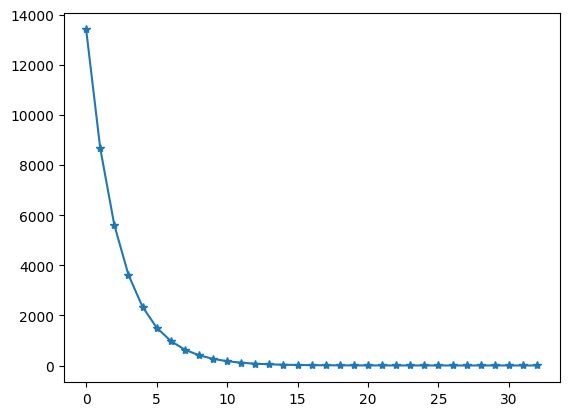

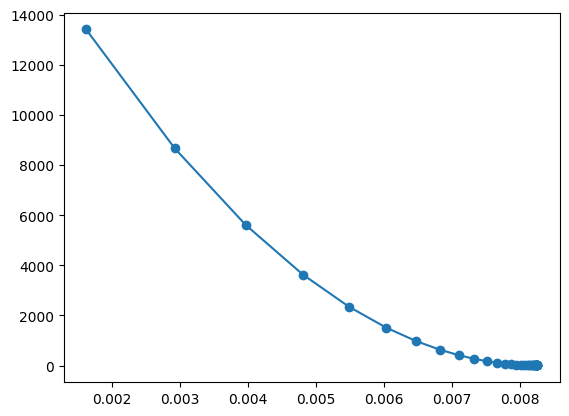

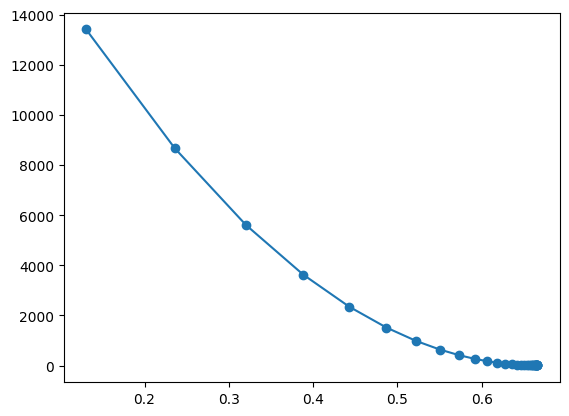

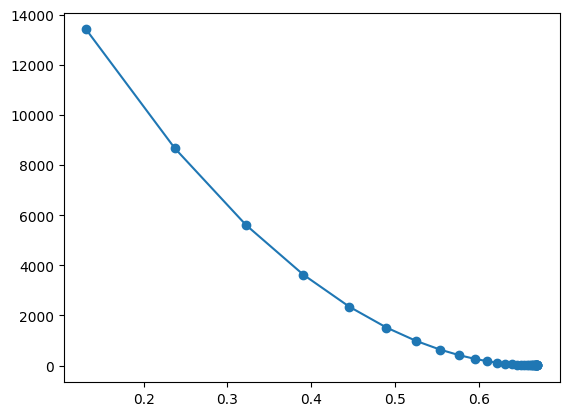

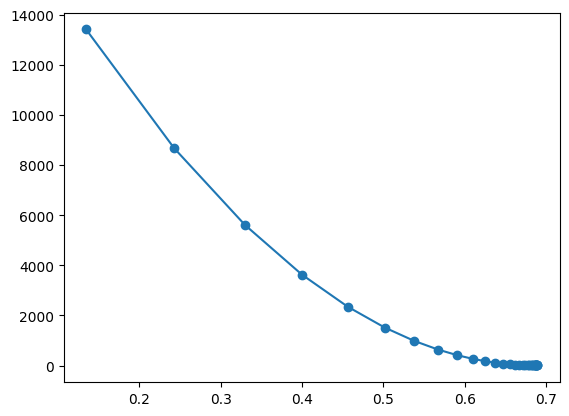

In [54]:
plt.plot(loss_vec, marker='*')
plt.show()
thetas_vec=np.array(thetas_vec)
plt.plot(thetas_vec[:,0],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,1],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,2],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,3],loss_vec, marker='o')
plt.show()

## Single Variable Linear Regression:

### Data Generation
- To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b>.
- The values in <b>X</b> are <b>50 data points</b> equally distributed between <b>0</b> and <b>20</b>.
- You should use <b>np.linspace(0,20)</b> to generate X data points. 
- The values in <b>y</b> will be generated by the equation:
$\mathbf{y_i = a*x_i + b ; a = -2, b = 1}$.
- Reshape both X and y to be column vectors.

## Single Variable 

In [55]:
X = np.linspace(0,20,50)
print(f'X:\n {X}')

X:
 [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [56]:
x=X.reshape(-1,1)

In [57]:
x

array([[ 0.        ],
       [ 0.40816327],
       [ 0.81632653],
       [ 1.2244898 ],
       [ 1.63265306],
       [ 2.04081633],
       [ 2.44897959],
       [ 2.85714286],
       [ 3.26530612],
       [ 3.67346939],
       [ 4.08163265],
       [ 4.48979592],
       [ 4.89795918],
       [ 5.30612245],
       [ 5.71428571],
       [ 6.12244898],
       [ 6.53061224],
       [ 6.93877551],
       [ 7.34693878],
       [ 7.75510204],
       [ 8.16326531],
       [ 8.57142857],
       [ 8.97959184],
       [ 9.3877551 ],
       [ 9.79591837],
       [10.20408163],
       [10.6122449 ],
       [11.02040816],
       [11.42857143],
       [11.83673469],
       [12.24489796],
       [12.65306122],
       [13.06122449],
       [13.46938776],
       [13.87755102],
       [14.28571429],
       [14.69387755],
       [15.10204082],
       [15.51020408],
       [15.91836735],
       [16.32653061],
       [16.73469388],
       [17.14285714],
       [17.55102041],
       [17.95918367],
       [18

In [58]:
a=-2
b=1
y=a*X+b
print(f'y:\n {y}')

y:
 [  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.67346939
 -23.48979592 -24.30612245 -25.12244898 -25.93877551 -26.75510204
 -27.57142857 -28.3877551  -29.20408163 -30.02040816 -30.83673469
 -31.65306122 -32.46938776 -33.28571429 -34.10204082 -34.91836735
 -35.73469388 -36.55102041 -37.36734694 -38.18367347 -39.        ]


### Plot the data (scatter plot of X,y)

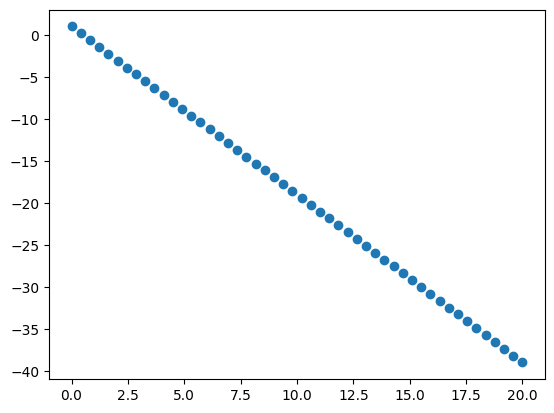

In [59]:
plt.scatter(X,y)
plt.show()

### Use the Mini-Batch GD Multivariable LR function for this data

##### The following results uses the hyper-parameters alpha = 0.001, max. epochs = 500, 0.001 for both stop conditions, and batch size = 8.

In [60]:
alpha=0.001
thetas = np.zeros(x_sh.shape[1])
batch_size=8
batch_nums=int(m/batch_size)
loss_vec=[]
thetas_vec=[]
prev_loss = float('inf')
iterations=[]
for epoch in range(500):
    for batch in range(batch_nums):
        iterations.append(batch)
        if batch+1==batch_nums:
            start=batch*batch_size
            x_batch=x_sh[start:]
            y_batch=y_sh[start:]
        else:
            start=batch*batch_size
            end=(batch+1)*batch_size
            x_batch=x_sh[start:end]
            y_batch=y_sh[start:end]
        h=x_batch@thetas
        e=h-y_batch
        j= np.mean(e**2) / 2
        grad=(x_batch.T@e)/batch_size
        if np.linalg.norm(grad) < 0.001:
                break
        thetas-=alpha*grad
        thetas_vec.append(thetas.copy())
        loss_vec.append(j)
    avg_loss = np.mean(loss_vec[-batch_nums:])
    if abs(prev_loss - avg_loss) < 0.001:
        break
    prev_loss = avg_loss   
    if epoch==1:
        print(f"j = {j}\n")
        print(f"Gradient vector : {grad}\n")
        print(f"Gradient norm : {np.linalg.norm(grad)}\n")
        print(f"New thetas : {thetas}\n")       


j = 9.320223126251555e+16

Gradient vector : [4.81015686e+08 3.58201537e+10 3.69559569e+10 3.68731361e+10]

Gradient norm : 63314182485.439186

New thetas : [  -456843.70977718 -33936656.10973524 -35080344.94372693
 -34895781.67312907]



c:\Users\YOUSSEF\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_18952\58829726.py:23: RuntimeWarning: overflow encountered in square
  j= np.mean(e**2) / 2
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_18952\58829726.py:31: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(prev_loss - avg_loss) < 0.001:
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_18952\58829726.py:24: RuntimeWarning: overflow encountered in matmul
  grad=(x_batch.T@e)/batch_size
C:\Users\YOUSSEF\AppData\Local\Temp\ipykernel_18952\58829726.py:27: RuntimeWarning: invalid value encountered in subtract
  thetas-=alpha*grad


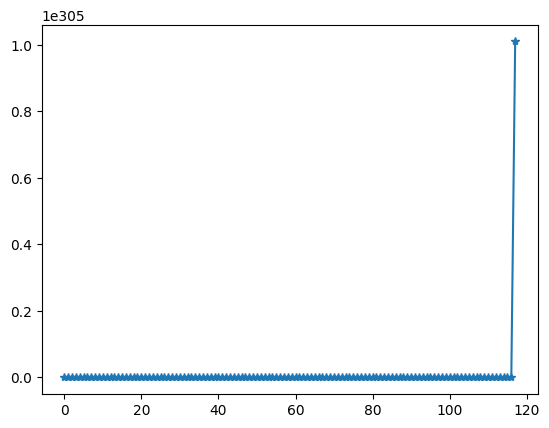

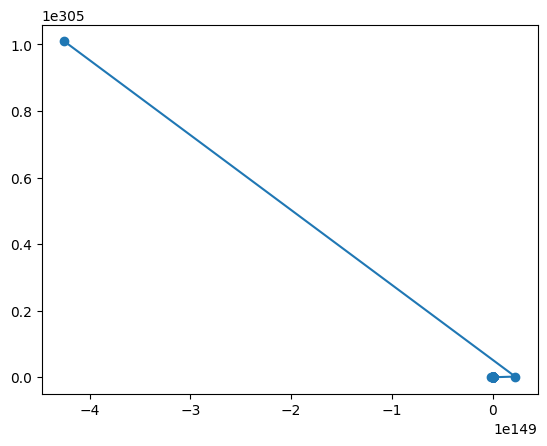

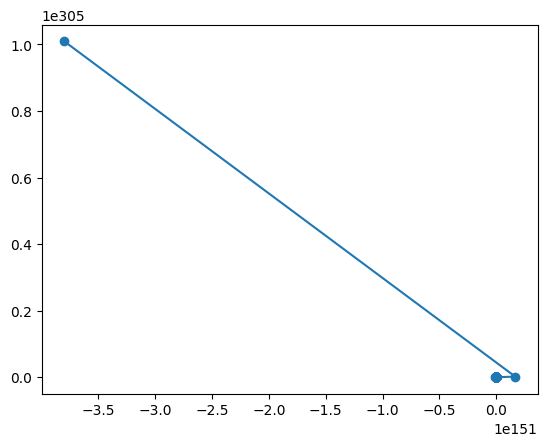

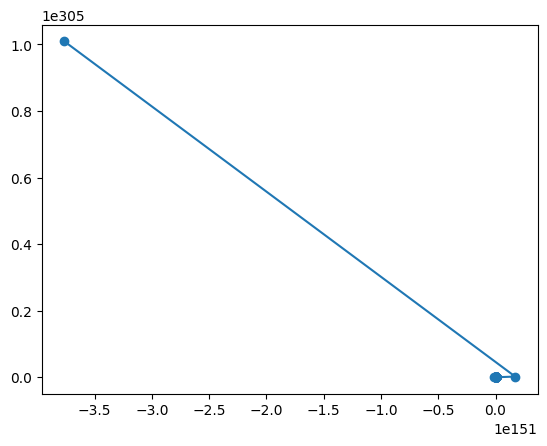

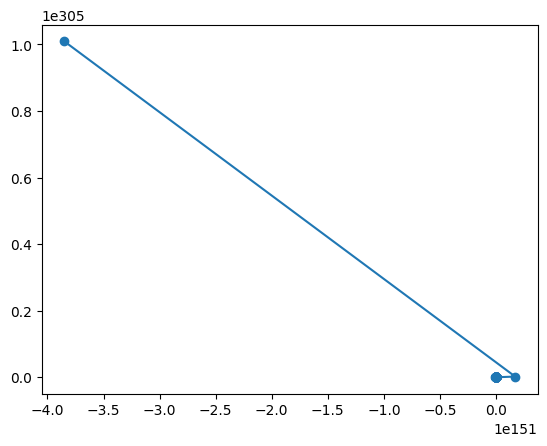

In [61]:
plt.plot(loss_vec, marker='*')
plt.show()
thetas_vec=np.array(thetas_vec)
plt.plot(thetas_vec[:,0],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,1],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,2],loss_vec, marker='o')
plt.show()
plt.plot(thetas_vec[:,3],loss_vec, marker='o')
plt.show()